# SKU Outlier Exploration
## Apa itu SKU?
Stock Keeping Unit (SKU) adalah kode unik yang diberikan kepada setiap item barang, baik yang dibeli maupun dijual oleh para pekerja wirausaha. Bisa didefinisikan juga bahwa stock keeping unit (SKU) adalah metode penamaan pada tiap produk yang akan ditawarkan atau dijual. 

Umumnya, SKU dibuat dalam urutan atau deretan angka yang akan dilabelkan pada suatu produk dan secara otomatis menjadi identitas produk tersebut. Inilah yang menyebabkan SKU juga kadang disebut sebagai part number, product number, atau product identifier. 

Deretan angka yang menjadi kode unik itulah yang bisa dijadikan sebagai pembeda antara suatu item barang yang satu dengan barang yang lainnya. Tidak jarang, SKU dicetak dalam bentuk kode batang atau barcode. 

 
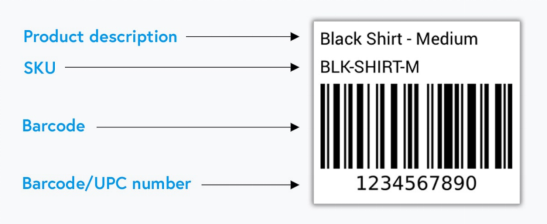


### Membuat SKU
Membuat SKU dengan data yang diambil dari nama depan produk dan kategori.

Berikut adalah langkah yang harus dilakukan:

- Buatlah kode SKU dari tabel product dengan ketentuan, DQ-(huruf awal kolom product_category)-(huruf awal product_name)
- Sebagai contoh, produk Buku Agenda DQLAB dengan kategori Merchandise memiliki kode SKU = DQ-M-BAD

In [1]:
#Import Library
import pandas as pd

#Membaca dataset dari CSV
df_product = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/tbl_product.csv')

#mengambil huruf pertama setiap kata
def get_initials(text):
    return ''.join([word[0] for word in text.split() if word[0].isalpha()])

#Membuat kode SKU pada kolom stock_id
df_product['stock_id'] = 'DQ-' + \
    df_product['product_category'].apply(get_initials) + '-' + \
    df_product['product_name'].apply(get_initials)

#Menampilkan hasil
print(df_product)



      product_id               product_name   product_category  product_cost  \
0   DQProduk-001          Buku Agenda DQLab        Merchandise        149850   
1   DQProduk-002          Termos Logo DQLab        Merchandise        149850   
2   DQProduk-003         Sticky Notes DQLab         Alat Tulis         29850   
3   DQProduk-004          Notebook A5 DQLab       Buku Catatan        149850   
4   DQProduk-005         Dompet Kartu DQLab        Merchandise        119850   
5   DQProduk-006      Earphone Kantor DQLab         Elektronik        104850   
6   DQProduk-007          Botol Minum DQLab        Merchandise        179850   
7   DQProduk-008           Kartu Nama DQLab     Kertas & Cetak         59850   
8   DQProduk-009         Pulpen Metal DQLab         Alat Tulis        149850   
9   DQProduk-010      Kotak Serbaguna DQLab         Organisasi        164850   
10  DQProduk-011   Bingkai Sertifikat DQLab  Perlengkapan Meja        164850   
11  DQProduk-012             Rak Meja DQ

## Apa itu Outlier?
Outlier adalah sebuah istilah yang berkaitan dengan nilai atau data yang terjadi penyimpangan atau deviasi. Mengutip laman Research Connections, outlier diartikan sebagai suatu observasi dalam suatu kumpulan data yang jauh berbeda dengan observasi lain dalam kumpulan data tersebut. Titik data berukuran luar biasa besar atau lebih kecil dibandingkan titik data lainnya.

Menurut handbook yang dipublikasikan National Institute of Standards and Technology (NIST), outlier adalah observasi yang terletak pada jarak abnormal dari nilai lain dalam sampel acak dari suatu populasi. Dalam arti tertentu, definisi ini mengarah kepada analis (atau proses konsensus) untuk memutuskan apa yang dianggap abnormal. Sebelum observasi abnormal dapat diidentifikasi, observasi normal perlu dikarakterisasi.

Outlier dapat mengungkap informasi penting tentang fenomena mendasar yang Anda pelajari, tetapi juga dapat disebabkan kesalahan pengukuran, kesalahan entri data, atau variasi data alami. Peneliti dan analis menentukan apa yang diklasifikasikan sebagai outlier serta memutuskan apakah akan menghapus nilai ekstrem dari kumpulan data.

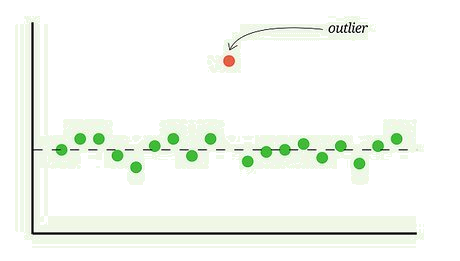

### Mempersiapkan Dataset Untuk Mendeteksi Outlier
Outlier dalam statistik dapat mengubah hasil data secara signifikan, terutama jika mencoba menghitung rata-rata atau kumpulan data yang semua titik data lainnya memiliki rentang nilai berbeda. Pada akhirnya akan menghapus outlier dari hasil, jika ternyata hal tersebut disebabkan oleh kesalahan. Namun, penting untuk menganalisisnya terlebih dahulu untuk memahami maknanya. Dalam kasus penjualan, outlier berarti penjualan SKU ini bisa jauh di atas rata-rata (outlier positif) atau jauh dibawah rata-rata (outlier negatif). Perlu dianalisis mengapa sangat laris atau kurang laku penjualan tersebut.

Hubungan antara outlier dan SKU:
- Gabungkan dua dataset (Stock & Product) yang telah dibuat Kode SKU 
- Ambil beberapa kolom yang penting seperti stock_id, product_name, product_category, dan unit_sold


In [2]:
#membaca library
import pandas as pd

#membaca dataset dari file csv
df_stock = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/tbl_stock.csv')
df_product = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/tbl_product.csv')

#mengambil huruf pertama setiap kata
def get_initials(text):
    return ''.join([word[0] for word in text.split() if word[0].isalpha()])

#Membuat kode SKU pada kolom stock_id
df_product['stock_id'] = 'DQ-' + \
    df_product['product_category'].apply(get_initials) + '-' + \
    df_product['product_name'].apply(get_initials)

#menggabungkan dua dataset
df_merged = pd.merge(df_stock, df_product, on = 'product_id', how = 'left')

#memilih dataset yang digunakan
df_merged = df_merged[['stock_id', 'product_name', 'product_category', 'unit_sold']]

#menampilkan dataset
print(df_merged.head())


    stock_id        product_name product_category  unit_sold
0   DQ-M-BAD   Buku Agenda DQLab      Merchandise         87
1   DQ-M-TLD   Termos Logo DQLab      Merchandise         70
2  DQ-AT-SND  Sticky Notes DQLab       Alat Tulis          9
3  DQ-BC-NAD   Notebook A5 DQLab     Buku Catatan         17
4   DQ-M-DKD  Dompet Kartu DQLab      Merchandise         25


## Teknik Pendeteksian Outlier
- Z-Score, 
Z-Score Merupakan ukuran berapa banyak deviasi standar suatu pengamatan dari rata-rata. Dalam hal ini aturan umum yang digunakan pada konteks pendeteksian outlier adalah bahwa titik data dengan nilai Z-score lebih besar dari 3 atau kurang dari -3 dianggap sebagai outlier. Penghitungan nilai Z-score ini dilakukan dengan mengurangkan nilai tiap observasi di variabel tertentu dengan nilai rata-rata dari variabel tersebut kemudian membaginya dengan standar deviasi variabel itu sendiri. Atau secara matematis, dituliskan sebagai berikut:

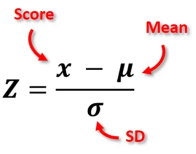

Dalam python, untuk mendeteksi outlier dengan Z-Score menggunakan kode sebagai berikut

df[‘nama kolom baru'] = zscore(df ['nama kolom yang akan dicari Z-Score nya'])

dimana df adalah dataframe yang digunakan

### Mengidentifikasi Outlier dengan Z-Score
Berikut adalah langkah yang akan aku lakukan:

- Deteksi setiap penjualan (unit_sold) yang kemungkinan memiliki outlier dengan Z-score
- Buatlah kolom baru yang berisikan nilai z-score dan beri nama zscore_unit_sold
- Buatlah kolom baru yang berisikan kriteria z-score apakah nilainya diatas 3 (upper) dan kurang dari 3 (lower) 

In [3]:
#Import Library
import pandas as pd
from scipy.stats import zscore
import numpy as np

#Membaca dataset dari file CSV
df_merged = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/stock.csv')

#Menghitung z-score untuk kolom unit_sold
df_merged['zscore_unit_sold'] = zscore(df_merged['unit_sold'])

#Filter data yang merupakan outlier (z-score < -3 atau > 3)
outliers_z = df_merged[(df_merged['zscore_unit_sold'] < -3) | (df_merged['zscore_unit_sold'] > 3)].copy()

#Menambahkan kolom apakah outlier termasuk lower atau upper
outliers_z['outlier_type'] = np.where(
    outliers_z['zscore_unit_sold'] < -3, 'lower', 'upper'
)

#Menampilkan semua outlier
print(outliers_z.head())


      stock_id      date           product_name product_category  unit_sold  \
7    DQ-KC-KND  1/1/2024       Kartu Nama DQLab   Kertas & Cetak        372   
28    DQ-E-EKD  1/2/2024  Earphone Kantor DQLab       Elektronik        427   
91    DQ-E-EKD  1/5/2024  Earphone Kantor DQLab       Elektronik        314   
153   DQ-E-EKD  1/8/2024  Earphone Kantor DQLab       Elektronik        337   
155  DQ-KC-KND  1/8/2024       Kartu Nama DQLab   Kertas & Cetak        332   

      price    cost  stock_available  zscore_unit_sold outlier_type  
7    104850   59850              456          4.205653        upper  
28   224850  104850              485          4.963340        upper  
91   224850  104850              405          3.406637        upper  
153  224850  104850              361          3.723488        upper  
155  104850   59850              370          3.654607        upper  


## IQR (Interquartile Range) Method
Metode ini mengidentifikasi pencilan sebagai titik-titik data yang berada di bawah kuartil pertama atau di atas kuartil ketiga dengan faktor IQR dengan faktor yang umum digunakan adalah 1,5. Formula yang digunakan untuk menghitung IQR sendiri adalah sebagai berikut:

IQR = Q3 — Q1

dengan Q1 adalah kuartil pertama (25%) dari data pada variabel tertentu sedangkan Q3 adalah kuartil ketiga (75%) dari data pada variabel tertentu. Setelah nilai IQR ini diperoleh, maka yang perlu ditentukan selanjutnya adalah batas bawah dan batas atas. Formula untuk batas bawah adalah sebagai berikut:

Lower outlier gate = Q1 — (1,5*IQR)

Sedangkan formula untuk batas adalah sebagai berikut:

Upper outlier gate = Q3 + (1,5*IQR)

Sehingga dalam hal ini nilai pencilan berdasarkan metode IQR diidentifikasi sebagai nilai-nilai observasi yang lebih kecil dari nilai batas bawah atau lebih besar dari nilai batas atas.

### Mengidentifikasi Outlier dengan IQR Method
Berikut langkah yang akan aku lakukan:

- Deteksi setiap penjualan (unit_sold) yang kemungkinan memiliki outlier dengan IQR
- Buat kolom baru yang berisikan kriteria IQR apakah nilainya upper dan lower

In [4]:
#Import Library
import pandas as pd
import numpy as np

#Membaca dataset
df_merged = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/stock.csv')

#Hitung Q1, Q3, dan IQR
Q1 = df_merged['unit_sold'].quantile(0.25)
Q3 = df_merged['unit_sold'].quantile(0.75)
IQR = Q3 - Q1

#Hitung batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter outliers
outliers_iqr = df_merged[(df_merged['unit_sold'] < lower_bound) | (df_merged['unit_sold'] > upper_bound)].copy()

#Tambahkan kolom jenis outlier (lower / upper)
outliers_iqr['outlier_type'] = np.where(
    outliers_iqr['unit_sold'] < lower_bound, 'lower', 'upper'
)

#Tampilkan hasil
print(outliers_iqr.head())


      stock_id      date           product_name product_category  unit_sold  \
7    DQ-KC-KND  1/1/2024       Kartu Nama DQLab   Kertas & Cetak        372   
28    DQ-E-EKD  1/2/2024  Earphone Kantor DQLab       Elektronik        427   
70    DQ-E-EKD  1/4/2024  Earphone Kantor DQLab       Elektronik        250   
91    DQ-E-EKD  1/5/2024  Earphone Kantor DQLab       Elektronik        314   
106   DQ-M-BAD  1/6/2024      Buku Agenda DQLab      Merchandise        219   

      price    cost  stock_available outlier_type  
7    104850   59850              456        upper  
28   224850  104850              485        upper  
70   224850  104850              265        upper  
91   224850  104850              405        upper  
106  239850  149850              229        upper  


## Visualisasi dengan Box Plot dan Scatter Plot
Untuk pendekatan visualisasi, maka box plot dan scatter plot adalah tools visualisasi yang paling umum digunakan untuk memvisualisasikan dan mendeteksi outlier.

Pada box plot, konsep outlier yang digunakan persis sama dengan metode IQR. Hanya saja box plot bertugas untuk memvisualisasikan hasil penghitungan pencilan dengan metode IQR tersebut. 

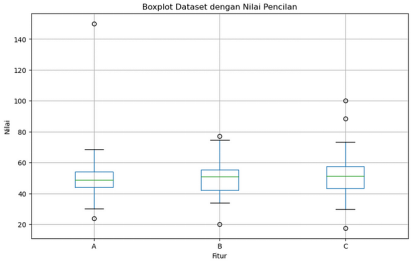

Sedangkan pada scatter plot, outlier dapat diidentifikasi dengan memperhatikan titik-titik yang berada jauh dari pola umum titik-titik data lainnya. Titik-titik yang jauh dari pola umum dapat dianggap sebagai outlier dan perlu diperiksa lebih lanjut.

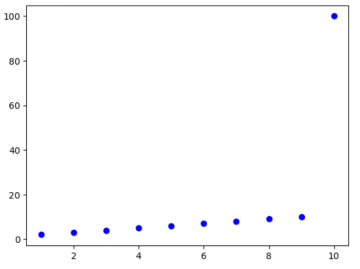


### Mengidentifikasi Outlier dengan Box Plot
Berikut adalah langkah yang akan dilakukan:

- Deteksi setiap penjualan (unit_sold) yang kemungkinan memiliki outlier dengan Boxplot
- Visualisasikan berdasarkan kategori sebuah produk
- Gunakan Boxplot yang disediakan oleh Seaborn
- Buat ukuran chart menjadi 14x6

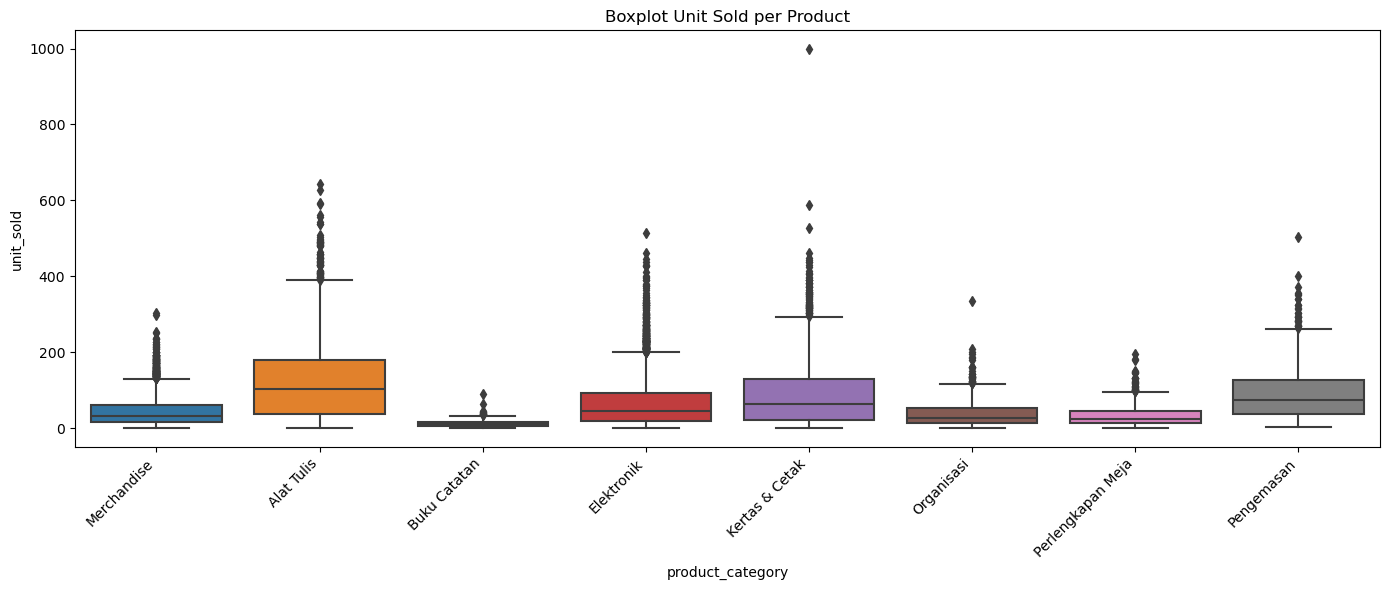

In [1]:
#Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Membaca dataset
df_merged = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/stock.csv')

#Ukuran figure
plt.figure(figsize = (14, 6))

#Membuat boxplot unit_sold untuk setiap product_category
sns.boxplot(data = df_merged, x = 'product_category', y = 'unit_sold')

#Format visual
plt.title('Boxplot Unit Sold per Product')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

#Tampilkan plot
plt.show()


### Mengidentifikasi Outlier dengan Scatter Plot
Berikut adalah langkah yang dilakukan:

- Deteksi setiap penjualan (unit_sold) yang kemungkinan memiliki outlier dengan Scatter Plot
- Visualisasikan berdasarkan kategori sebuah produk
- Gunakan Scatter Plot yang disediakan oleh Seaborn
- Buat ukuran chart menjadi 14x6

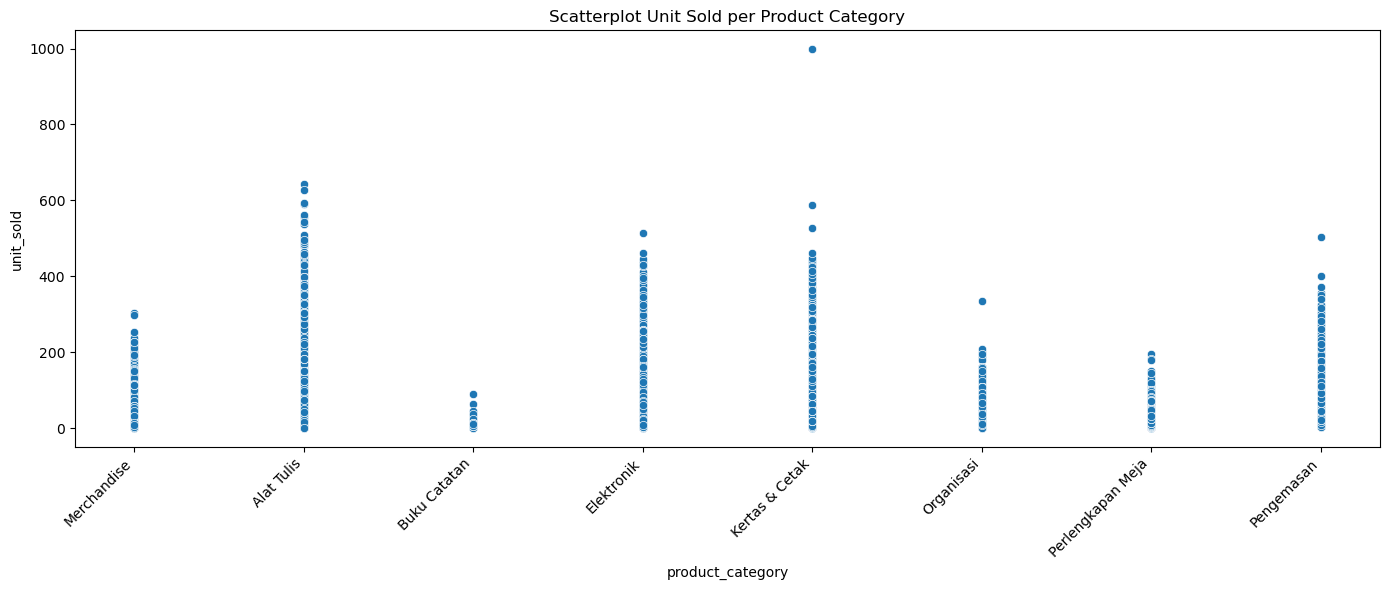

In [2]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca dataset
df_merged = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/stock.csv')

# Ukuran figure
plt.figure(figsize = (14, 6))

# Membuat scatterplot unit_sold untuk setiap product_category
sns.scatterplot(data = df_merged, x = 'product_category', y = 'unit_sold')

# Format visual
plt.title('Scatterplot Unit Sold per Product Category')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

# Tampilkan plot
plt.show()


Box plot bisa kasih ringkasan statistik mulai dari median, kuartil, sampai outlier. Cocok buat lihat distribusi umum dalam kategori. Sementara scatter plot menunjukkan tiap SKU sebagai titik individu, jadi lebih detail untuk analisis per produk.